# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Nilou Shahbandi
- Leonardo Gonzalez
- Brian Chen
- Tin-Trung Pham
- Zhongkang(ken) Fang

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

### *Dataset 1*

(Copy this information for each dataset)
- Dataset Name: annual_aqi_by_county_2010
- Link to the dataset: https://aqs.epa.gov/aqsweb/airdata/download_files.html
- Number of observations: 999


- data contains AQI, calculated each day for each monitor for the Criteria Gases and PM10 and PM2.5 (FRM and non FRM).
- of Days CO, NO2, Ozone, SO2, PM2.5, PM10 where the daily monitor criteria were met.

- We extract the year of 2010 from the cancer data and merge with this data.
- We will also add more years differentiate by colums and merge with cancer data which already have different years.


### *Dataset 2*

(Copy this information for each dataset)
- Dataset Name: Lung and Bronchus Cancer Incidence in California
- Link to the dataset:[California Cancer Registry](https://explorer.ccrcal.org/application.html?site=47&data_type=1&graph_type=13&compareBy=sex&chk_sex_1=1&race=1&age_range=9&hdn_stage=101&year=4&advopt_precision=4&advopt_display=2#tableWrap)
- Number of observations: 9306
- 2010 - 2018

This data shows us the counts of lung or bronchus cancer in individuals of all races and sexes by county in California. It also includes breakdowns by age with additional statistics regarding the data.

We plan to use this data in combination with the pollution data to track the impact of pollution on lung or bronchus cancer indcidents in individuals living in California. By comparing changes in pollution with changes in cancer incident counts.


### *Dataset 3*

(Copy this information for each dataset)
- Dataset Name: 
- Link to the dataset:
- Number of observations:

#### Description:
- 


#### If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.
- 

# Setup

In [264]:
## YOUR CODE HERE
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Statmodels & patsy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr, norm, ttest_ind


aqi_2010 = pd.read_csv('data/aqireport2010.csv')
aqi_2011 = pd.read_csv('data/aqireport2011.csv')
aqi_2012 = pd.read_csv('data/aqireport2012.csv')
aqi_2013 = pd.read_csv('data/aqireport2013.csv')
aqi_2014 = pd.read_csv('data/aqireport2014.csv')
aqi_2015 = pd.read_csv('data/aqireport2015.csv')
aqi_2016 = pd.read_csv('data/aqireport2016.csv')
aqi_2017 = pd.read_csv('data/aqireport2017.csv')
aqi_2018 = pd.read_csv('data/aqireport2018.csv')
county_cancer_all = pd.read_csv('data/countyCancer.csv')
asthma = pd.read_csv('data/Asthma.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [265]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
asthma.head()

,State,ChildCount,Percent,Year,AdultCount,Percent.1
0,Alabama,"141,500",13.20%,2014.0,"394,600",10.50%
1,Alaska,---,---,NaN,"50,700",9.20%
2,Arizona,"129,200",8.10%,2016.0,"545,100",10.00%
3,Arkansas,---,---,NaN,"225,900",9.80%
4,California,"542,700",6.20%,NaN,"2,607,600",8.50%


In [266]:
def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output


In [267]:
aqi_2010.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2010.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2010['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2010.head()

,county,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,245,4,68.0,43.0
1,amador,302,10,64.0,35.0
2,butte,208,13,84.0,47.0
3,calaveras,271,12,84.0,41.0
4,colusa,322,1,49.0,38.0


In [268]:
county_cancer_all = pd.read_csv('data/countyCancer.csv')
county_cancer_all = county_cancer_all[county_cancer_all['Age'] == 'All Ages']
county_cancer_all.drop(['Sex', 'Race/Ethnicity', 'Age', 'Stage at Diagnosis', 'Age-adjusted Rate Standard Error',
                         'Age-adjusted Rate Lower Confidence Interval', 'Age-adjusted Rate Upper Confidence Interval'], 
                 inplace = True, axis=1)
county_cancer_all['California Region'] = county_cancer_all['California Region'].apply(standardize_region)
county_cancer_all.columns = ['year','county', 'rate per 100,000', 'count']
county_cancer_all = county_cancer_all[county_cancer_all['rate per 100,000'] != 'a']
county_cancer_all.head()

,year,county,"rate per 100,000",count
0,2010,alameda,44.8118,646
1,2010,butte,63.0616,171
2,2010,contra costa,50.2429,536
3,2010,el dorado,54.2364,124
4,2010,fresno,51.7782,401


In [269]:

county_cancer_2010 = county_cancer_all[county_cancer_all['year'] == 2010]

county_cancer_2010.head()

,year,county,"rate per 100,000",count
0,2010,alameda,44.8118,646
1,2010,butte,63.0616,171
2,2010,contra costa,50.2429,536
3,2010,el dorado,54.2364,124
4,2010,fresno,51.7782,401


In [270]:
# cobome cancer and aqi data for the year of 2010
county_cancer_2010 = county_cancer_2010.drop(county_cancer_2010.index[39:47])


aqi_cancer_2010 = pd.merge(county_cancer_2010, aqi_2010, on='county')
aqi_cancer_2010.head()
aqi_cancer_2010['rate per 100,000'] = aqi_cancer_2010['rate per 100,000'].astype(float)
aqi_cancer_2010['count'] = aqi_cancer_2010['count'].astype(float)
#aqi_cancer_2010['Unhealthy days'] = aqi_cancer_2010['Unhealthy days'].astype(int)
aqi_cancer_2010.head()

,year,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,2010,alameda,44.8118,646.0,245,4,68.0,43.0
1,2010,butte,63.0616,171.0,208,13,84.0,47.0
2,2010,contra costa,50.2429,536.0,307,8,64.0,39.0
3,2010,el dorado,54.2364,124.0,251,23,93.0,42.0
4,2010,fresno,51.7782,401.0,99,65,130.0,70.0


In [271]:
# AQI 2010-2018 combine with Cancer rate 2010-2018
county_cancer_2010 = county_cancer_all[county_cancer_all['year'] == 2010]
county_cancer_2011 = county_cancer_all[county_cancer_all['year'] == 2011]
county_cancer_2012 = county_cancer_all[county_cancer_all['year'] == 2012]
county_cancer_2013 = county_cancer_all[county_cancer_all['year'] == 2013]
county_cancer_2014 = county_cancer_all[county_cancer_all['year'] == 2014]
county_cancer_2015 = county_cancer_all[county_cancer_all['year'] == 2015]
county_cancer_2016 = county_cancer_all[county_cancer_all['year'] == 2016]
county_cancer_2017 = county_cancer_all[county_cancer_all['year'] == 2017]
county_cancer_2018 = county_cancer_all[county_cancer_all['year'] == 2018]
# 2011
aqi_2011.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2011.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2011['county'] = aqi_2010['county'].apply(standardize_region)
# 2012
aqi_2012.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2012.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2012['county'] = aqi_2010['county'].apply(standardize_region)
# 2013
aqi_2013.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2013.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2013['county'] = aqi_2010['county'].apply(standardize_region)
#2014
aqi_2014.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2014.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2014['county'] = aqi_2010['county'].apply(standardize_region)
#2015
aqi_2015.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2015.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2015['county'] = aqi_2010['county'].apply(standardize_region)
# 2016
aqi_2016.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2016.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2016['county'] = aqi_2010['county'].apply(standardize_region)
# 2017
aqi_2017.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2017.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2017['county'] = aqi_2010['county'].apply(standardize_region)
#2018
aqi_2018.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2018.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2018['county'] = aqi_2010['county'].apply(standardize_region)

aqi_cancer_2011 = pd.merge(county_cancer_2011, aqi_2011, on='county')
aqi_cancer_2011.head()

aqi_cancer_2012 = pd.merge(county_cancer_2012, aqi_2012, on='county')
aqi_cancer_2012.head()

aqi_cancer_2013 = pd.merge(county_cancer_2013, aqi_2013, on='county')
aqi_cancer_2013.head()

aqi_cancer_2014 = pd.merge(county_cancer_2014, aqi_2014, on='county')
aqi_cancer_2011.head()

aqi_cancer_2015 = pd.merge(county_cancer_2015, aqi_2015, on='county')
aqi_cancer_2015.head()

aqi_cancer_2016 = pd.merge(county_cancer_2016, aqi_2016, on='county')
aqi_cancer_2016.head()

aqi_cancer_2017 = pd.merge(county_cancer_2017, aqi_2017, on='county')
aqi_cancer_2017.head()

aqi_cancer_2018 = pd.merge(county_cancer_2018, aqi_2018, on='county')
aqi_cancer_2018.head()

aqi_cancer_comb = pd.concat([aqi_cancer_2010,aqi_cancer_2011,aqi_cancer_2012,aqi_cancer_2013,aqi_cancer_2014,aqi_cancer_2015,aqi_cancer_2016,aqi_cancer_2017,aqi_cancer_2018])
aqi_cancer_comb


,year,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,2010,alameda,44.8118,646.0,245,4,68.0,43.0
1,2010,butte,63.0616,171.0,208,13,84.0,47.0
2,2010,contra costa,50.2429,536.0,307,8,64.0,39.0
3,2010,el dorado,54.2364,124.0,251,23,93.0,42.0
4,2010,fresno,51.7782,401.0,99,65,130.0,70.0
...,...,...,...,...,...,...,...,...
34,2018,stanislaus,44.7967,260,157,32,108.0,54.0
35,2018,sutter,53.6884,62,153,22,100.0,54.0
36,2018,tulare,27.9206,122,73,95,140.0,77.0
37,2018,ventura,38.4863,401,174,16,87.0,52.0


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [272]:
# EDA

### Data Analysis(Asthma)

In [273]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Asthma

### Analysis(AQI)

We have a dataset from 53 different counties In California. Across these counties, the mean number of days in the year having AQI value 0 through 50 is 221.9 days.

The median AQI value is 45.29.
90% of daily AQI values during the year were less or equal to 80.59.

In [274]:
# AQI
aqi_2010.describe()

,Good days,AQI 90th Percentile,AQI Median
count,53.000000,53.000000,53.000000
mean,221.943396,80.594340,45.292453
std,93.189719,32.567542,15.517185
min,31.000000,21.000000,9.500000
25%,163.000000,58.000000,38.000000
50%,248.000000,80.000000,43.000000
75%,295.000000,93.000000,50.000000
max,358.000000,164.000000,87.000000


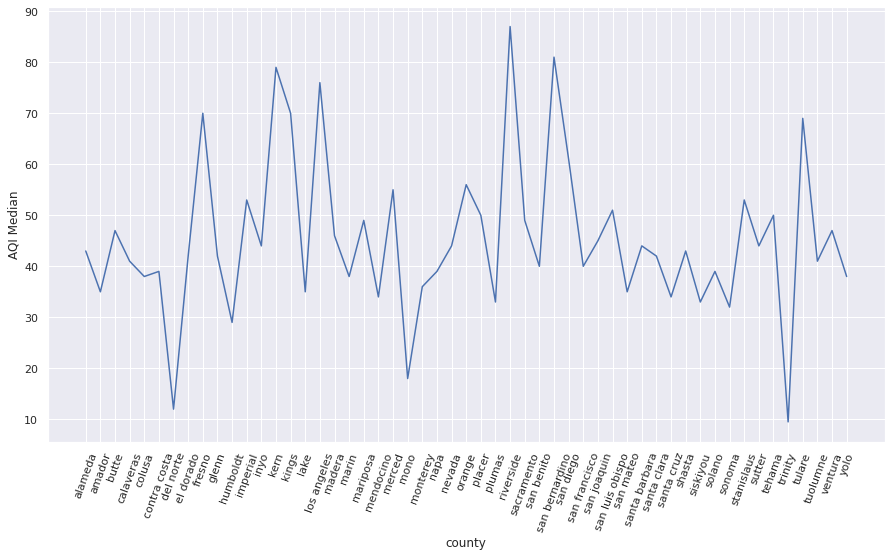

In [275]:
sns.set(rc = {'figure.figsize':(15,8)})
aqi_2010['County'] = aqi_2010['county'].apply(standardize_region)
ax = sns.lineplot(x ='county',y = 'AQI Median', data = aqi_2010)
ax.set_xticklabels(aqi_2010['county'], rotation = 70);

The plot we shows that all county have moderate or good AQI value. Some counties have good AQI value (0-50), while some counties have moderate AQI value (50-100).

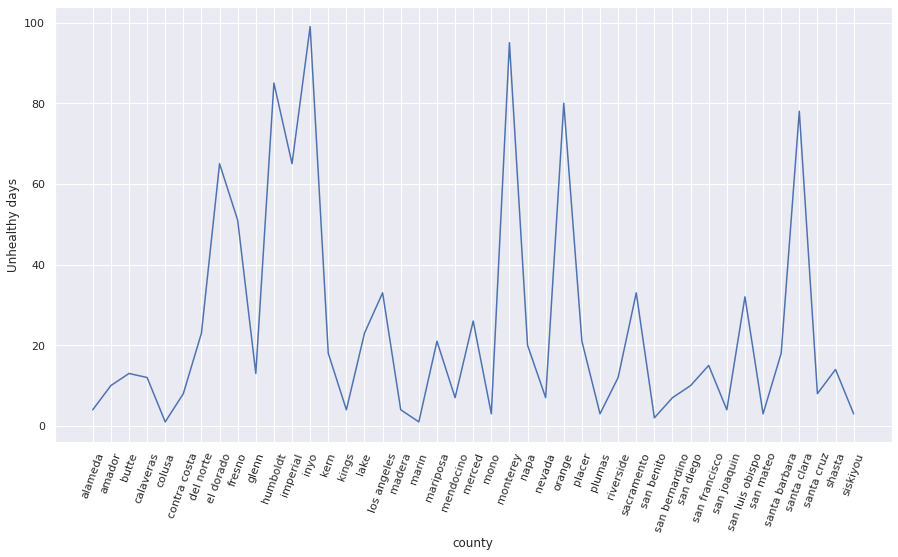

In [276]:
aqi_unhealthy = aqi_2010[aqi_2010['Unhealthy days'] != '.']
aqi_unhealthy['Unhealthy days'] = aqi_unhealthy['Unhealthy days'].astype(int)
ax = sns.lineplot(x ='county',y = 'Unhealthy days', data = aqi_unhealthy)
ax.set_xticklabels(aqi_2010['county'], rotation = 70);
sns.set(rc = {'figure.figsize':(15,8)})

In the county Inyo, 27% days of a year are unhealthy for sensity group, and in some counties like Siskiyou, colusa etc only have few unhealth days within a year. We expect counties with more unhealthy days to have higher cancer rate comparing to counties with less unhealthy day.

### Data Analysis(Cancer)


In [277]:
# County cancer

## Inference

In [278]:
#----------------------------------------------------------------------#
# inferences

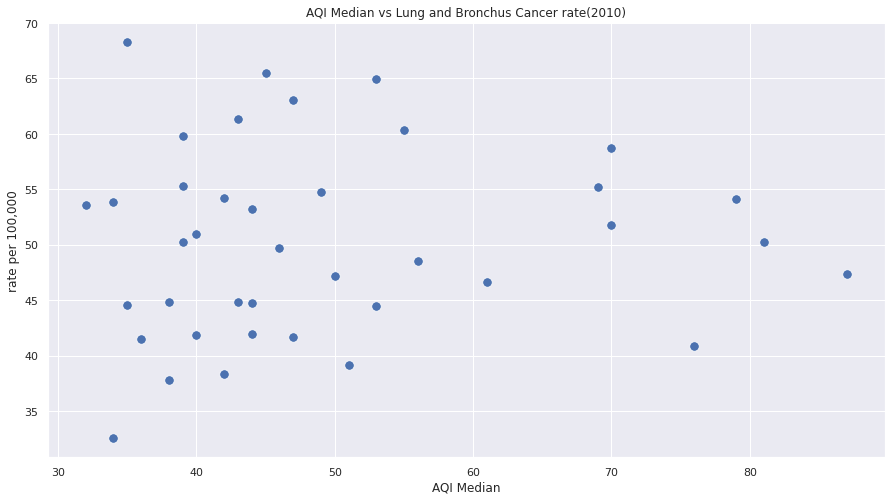

In [279]:

x1 = aqi_cancer_2010['AQI Median'];
y1 = aqi_cancer_2010['rate per 100,000'];
sns.scatterplot(x1,y1,s=90);
plt.title('AQI Median vs Lung and Bronchus Cancer rate(2010)');

### Analysis (AQI Median vs Lung and Bronchus Cancer rate - 2010)
    -
    -
    -
    -
    -




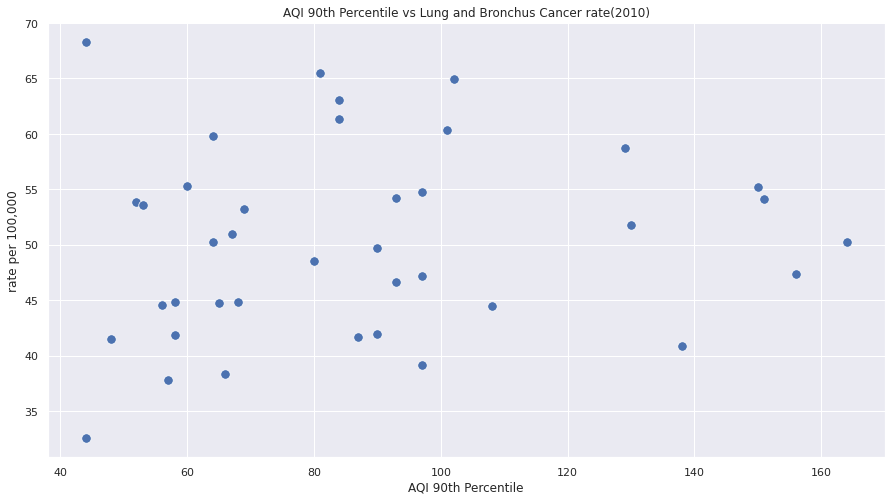

In [280]:
x1 = aqi_cancer_2010['AQI 90th Percentile'];
y1 = aqi_cancer_2010['rate per 100,000'];
sns.scatterplot(x1,y1,s=90);
plt.title('AQI 90th Percentile vs Lung and Bronchus Cancer rate(2010)');

### Analysis (AQI 90th Percentile vs Lung and Bronchus Cancer rate - 2010)
    -
    -
    -
    -
    -




Now look at data from 2010 - 2018

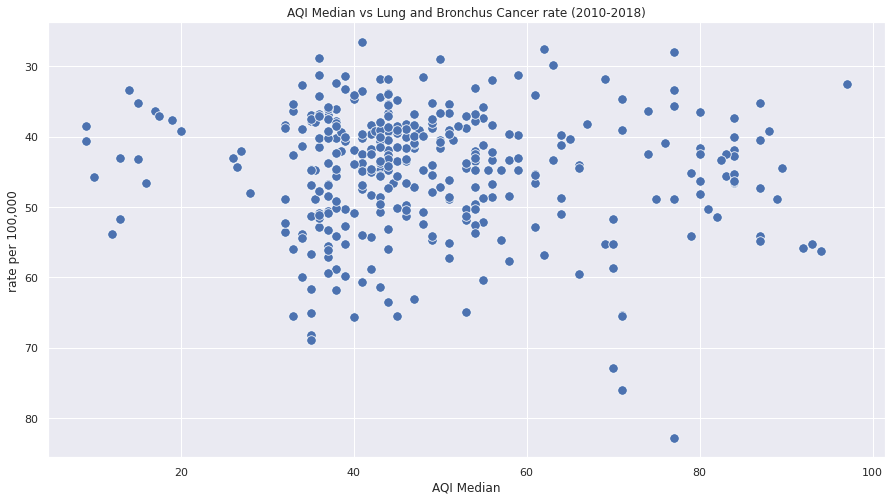

In [281]:
x1 = aqi_cancer_comb['AQI Median'];
y1 = aqi_cancer_comb['rate per 100,000'];
sns.scatterplot(x1,y1,s=90);
plt.title('AQI Median vs Lung and Bronchus Cancer rate (2010-2018)');

### Analysis (AQI Median vs Lung and Bronchus Cancer rate - 2010-2018)
    -
    -
    -
    -
    -

In [282]:
#Regression


aqi_cancer_2010.columns = ['year', 'county', 'rate' ,'count','Good days', 'Unhealthy days'
                           ,'AQI 90th Percentile', 'AQI']
outcome, predictors = patsy.dmatrices('rate ~ AQI', aqi_cancer_2010)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1544
Date:                Sat, 04 Jun 2022   Prob (F-statistic):              0.697
Time:                        20:38:50   Log-Likelihood:                -138.28
No. Observations:                  39   AIC:                             280.6
Df Residuals:                      37   BIC:                             283.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.3268      4.972      9.719      0.0

In [290]:
# overall
aqi_cancer_comb['rate per 100,000'] = aqi_cancer_comb['rate per 100,000'].astype(float)
aqi_cancer_comb.columns = ['year', 'county', 'rate' ,'count','Good days', 'Unhealthy days'
                           ,'AQI 90th Percentile', 'AQI']
outcome, predictors = patsy.dmatrices('rate ~ AQI', aqi_cancer_comb)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.891
Date:                Sat, 04 Jun 2022   Prob (F-statistic):              0.170
Time:                        20:40:25   Log-Likelihood:                -1248.5
No. Observations:                 350   AIC:                             2501.
Df Residuals:                     348   BIC:                             2509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9570      1.428     30.084      0.0

In [284]:
# five years later
aqi_cancer_fiveyears = pd.merge(county_cancer_2016, aqi_2011, on='county')
aqi_cancer_fiveyears['rate per 100,000'] = aqi_cancer_fiveyears['rate per 100,000'].astype(float)

aqi_cancer_fiveyears.columns = ['year', 'county', 'rate' ,'count','Good days', 'Unhealthy days'
                           ,'AQI 90th Percentile', 'AQI']
outcome, predictors = patsy.dmatrices('rate ~ AQI', aqi_cancer_fiveyears)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.543
Date:                Sat, 04 Jun 2022   Prob (F-statistic):             0.0398
Time:                        20:38:53   Log-Likelihood:                -130.20
No. Observations:                  39   AIC:                             264.4
Df Residuals:                      37   BIC:                             267.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4556      3.316     10.995      0.0

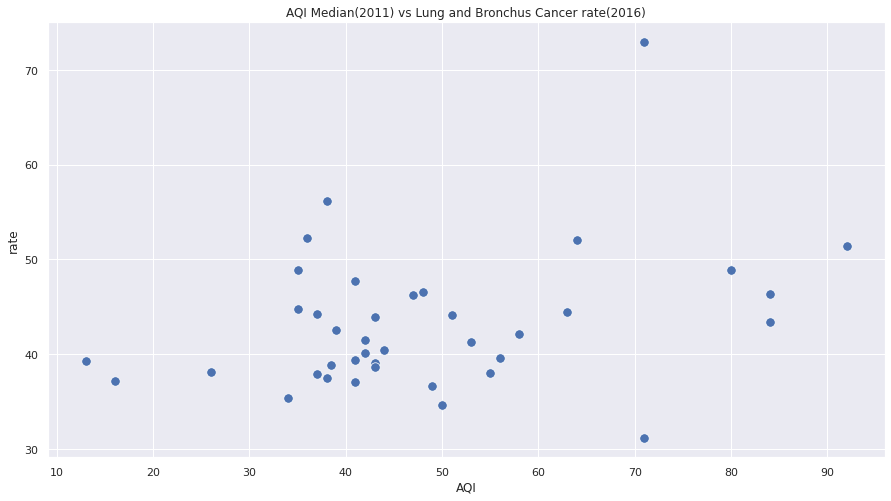

In [285]:
x1 = aqi_cancer_fiveyears['AQI'];
y1 = aqi_cancer_fiveyears['rate'];
sns.scatterplot(x1,y1,s=90);
plt.title('AQI Median(2011) vs Lung and Bronchus Cancer rate(2016)');

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*